# Homework Assignment #2 (Individual)
## Pandas Review and Python Classes

### <p style="text-align: right;"> &#9989; Hanwen Zuo</p>
### <p style="text-align: right;"> &#9989; zuohanwe</p>

### Goals for this homework assignment
By the end of this assignment, you should be able to:
- Write a generalizable class to store data
- Write subclasses that inherit general variables and methods from a parent class
- Identify key pieces of information that need to be stored as class variables
- Write methods that fetch and modify class variables 
- Write a function that instantiates new objects given some initial set of parameters

Work through the following assignment, making sure to follow all of the directions and answer all of the questions.

There are **100 points** possible on this assignment. Point values for each part are included in the section headers and question prompts.

**This assignment is due in roughly two weeks from now at 11:59 pm on February 17th.** It should be uploaded into the "Homework Assignments" submission folder for Homework #2.  Submission instructions can be found at the end of the notebook.

## Note: please run the cells in order to prevent errors with inheritance for the `Animal` and `Zoo` classes.

---
# Part 0: Add to your Git repository to track your progress on your assignment (5 points)

For this assignment, you're going to add it to the `cmse202-s23-turnin` repository you created in class so that you can track your progress on the assignment and preserve the final version that you turn in. In order to do this you need to

**&#9989; Do the following**:

1. Navigate to your `cmse202-s23-turnin` repository and create a new directory called `hw-02`.
2. Move this notebook into that **new directory** in your repository, then **add it and commit it to your repository**.
1. Finally, to test that everything is working, "git push" the file so that it ends up in your GitHub repository.

**Important**: Double check you've added your Professor and your TA as collaborators to your "turnin" repository (you should have done this in the previous homework assignment).

**Also important**: Make sure that the version of this notebook that you are working on is the same one that you just added to your repository! If you are working on a different copy of the notebook, **none of your changes will be tracked**!

If everything went as intended, the file should now show up on your GitHub account in the "`cmse202-s23-turnin`" repository inside the `hw-02` directory that you just created.  Periodically, **you'll be asked to commit your changes to the repository and push them to the remote GitHub location**. Of course, you can always commit your changes more often than that, if you wish.  It can be good to get into a habit of committing your changes any time you make a significant modification, or when you stop working on the project for a bit.

&#9989; **Do this**: Before you move on, put the command that your instructor should run to clone your repository in the markdown cell below.

git clone 'https://github.com/zuohanwe/CMSE202-s23-turnin.git'

---

### &#128721; STOP (3 Points)
**Pause to commit your changes to your Git repository!**
Take a moment to save your notebook, commit the changes to your Git repository with a meaningful commit message.

---

# Part 1: Loading a new dataset and visualize it (22 Points)

An important aspect of the recent lessons has been to look at an unknown dataset, use `pandas` to load it into a dataframe, analyze it, and finally visualize it. In the following, we will download a two-part dataset from the web and analyze it. It goes in a familiar direction: Animals. 

We will look at the following datasets

`https://raw.githubusercontent.com/msu-cmse-courses/cmse202-S23-data/main/HW/HW2/zoo.csv` 

`https://raw.githubusercontent.com/msu-cmse-courses/cmse202-S23-data/main/HW/HW2/class.csv`

which [comes from here](https://www.kaggle.com/datasets/uciml/zoo-animal-classification).




## Part 1.1 Downloading the Data (2 points)

Write the commands you used to download the datasets in the Jupyter notebook cell below.

In [29]:
#Write code here
# curl --remote-name https://raw.githubusercontent.com/msu-cmse-courses/cmse202-S23-data/main/HW/HW2/zoo.csv
# curl --remote-name https://raw.githubusercontent.com/msu-cmse-courses/cmse202-S23-data/main/HW/HW2/class.csv

## Part 1.2 Viewing the Dataset using the Command Line (2 points)

Open a terminal and use the **commandline** to view the datasets with the tools you learned in class or others that you know. Write the commands you used in the command line below.

In [30]:
#Write your commands here
# vi zoo.csv
# vi class.csv

## Part 1.3 Describe the Data (2 points)

Look at both datasets (`class.csv`, `zoo.csv`). Describe the contents of both datasets (E.g., the column kinds, what they represent, etc.). Pay close attention to the column `class_type` in the `zoo.csv` dataset and the column `class_number` in the `class.csv`.

<font size=6 color="#009600">&#9998;</font> 
### `class.csv`
`class.csv` contains `Class_Number` which has an integer from 1-7 sorted in ascending order; `Number_Of_Animal_Species_In_Class` which contains an integer between 5-41 and is not sorted, `Class_Type` which has a type such as `Reptile`, `Bird`, or `Fish`; and `Animal_Names` which contains names of each type of animal so `Reptile` has `pitviper`, `seasnake`, etc.
<br>
### `zoo.csv`
`zoo.csv` contains too many columns to list out here, but there are three primary categories that the columns fall into: animal_name, descriptor, and class_type. `animal_name` contains the name of the animal. The descriptor columns contain a certain feature such as `hair`, `feathers`, `eggs`, etc with a `1` standing for true and a `0` for false. Finally, `class_type` gives the type that the animal falls under and is correlated to `Class_Number` from `class.csv`.

## Part 1.4: Read in the Datasets with `pandas` (2 points)

&#9989; Use pandas to read in the `zoo.csv` and `class.csv` files into DataFrames.

In [31]:
# all imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [32]:
#Write code here
zoo_data = pd.read_csv('zoo.csv')
class_data = pd.read_csv('class.csv')

## Part 1.5 Counting Classes (2 Points). 

Look back in the PCA/ICA and see how we used `groupby` to find the number of Iris species and determine their statistical properties. Use the same methodology on the `zoo` DataFrame to find out how many of each there are (**not how many classes but e.g. how many mammals, fish, ...**). Use the `class.csv` to check your answer. 

In [33]:
# using groupby
zoo_data.groupby(['class_type']).count().iloc[:, :1]

,animal_name
class_type,
1,41
2,20
3,5
4,13
5,4
6,8
7,10


In [34]:
# checking with class data
class_data[['Class_Number', 'Number_Of_Animal_Species_In_Class']]

,Class_Number,Number_Of_Animal_Species_In_Class
0,1,41
1,2,20
2,3,5
3,4,13
4,5,4
5,6,8
6,7,10


<font size=6 color="#009600">&#9998;</font> Everything appears to match

## 1.6 Visualizing the Data (10 points)

&#9989; Similar to the iris dataset, where we classified iris flowers into specific species, we want to classify animal properties into animal classes. Let's say we want to tell fish and mammals apart. Make two scatter plots to cleanly separate the classes using attributes from your `zoo` dataset. Use different colors and different symbols for fish and mammals.

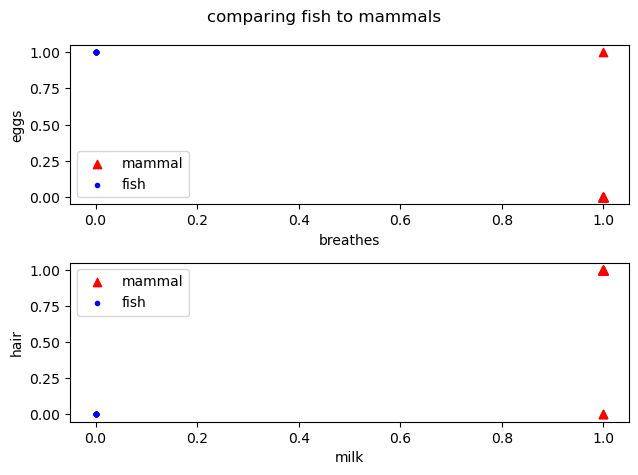

In [35]:
mammal = zoo_data[zoo_data['class_type'] == 1]
fish = zoo_data[zoo_data['class_type'] == 4]
plt.suptitle('comparing fish to mammals')
plt.subplot(2, 1, 1)
plt.scatter(mammal['breathes'], mammal['eggs'], c='red', marker='^', label='mammal')
plt.scatter(fish['breathes'], fish['eggs'], c='blue', marker='.', label='fish')
plt.legend()
plt.xlabel('breathes')
plt.ylabel('eggs')
plt.subplot(2, 1, 2)
plt.scatter(mammal['milk'], mammal['hair'], c='red', marker='^', label='mammal')
plt.scatter(fish['milk'], fish['hair'], c='blue', marker='.', label='fish')
plt.legend()
plt.xlabel('milk')
plt.ylabel('hair')
plt.tight_layout()
plt.show()

## 1.7 Reflecting on the Different Types of Data (2 points)

Look at the scatter plots you made to classify fish and mammals in the previous part and compare it to the scatter plots we made to separate the iris dataset. What differences do you notice?

<font size=6 color="#009600">&#9998;</font> We can separate fish and mammals more clearly than we can with the different iris types. This is because we have features that are mostly exclusive to one class or another. For instance, both the milk and breathes attributes separate the mammals and fish clearly.

---
### &#128721; STOP (3 Point)
**Pause to commit your changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your Git repository with a meaningful commit message.

---

# Part 2 Extending classes (41 Points)

For the next set of question, We will work once more with the `Animal` and `Zoo` class. Below is a version of the `Animal` class that we will build off of.



In [36]:
#Example class to build off of

class Animal(object):
    """
    This is an Animal class, used to store information about animals in the Zoo.
    """

    def __init__(self, kind, required_area=0):
        """ Initialize the Animal object.
        Inputs are
        kind: the type of animal (string)
        required_area: square meters (int)
        """
        self.kind = kind
        self.required_area = required_area


    def set_required_area(self, area):
        """ Set area required for a single animal. """
        self.required_area = area

    def set_kind(self, kind):
        """ Set the kind of the animal """
        self.kind = kind

    def get_kind(self):
        """ Return animal's kind. """
        return self.kind

    def get_required_area(self):
        """ Return area required for a single animal. """
        return self.required_area

## Part 2.1 Extending the `Animal` Class (18 Points)

### Part 2.1.1 Building a Test Animal (3 Points)

Before we start making changes to our classes, let's start by creating some test/example instances of them. In the cell below, pick your favorite animal and a fun name and create a new `Animal` object.


In [37]:
#Write your code here
python = Animal('Reptile')

### Part 2.1.2 Adding in Additional Information (5 Points)


Before we can begin building our zoo we need more information about the needs of our animals. Specifically, we need to think about the different habitats the animals live in. We now have that information from your dataframe. For our zoo, we will be building aquatic habitats, grassland habitats, and aviaries. Ultimately, we're going to need to know how big the different habitats will need to be.

&#9989; Extend the `Animal` class given above to store information to incorporate habitat information in the cell below.

In [38]:
#Write out your new Animal class here
parent_class = Animal

class Animal(parent_class):
    def __init__(self, kind: str, habitat: str, required_area: int=0) -> None:
        super().__init__(kind, required_area)
        self.habitat = habitat

### Part 2.1.3 Calculating Required Area (10 Points)

Now that we have our habitat information, we can use that to calculate the required area. First, we're going to assume that animals living in different habitats require the following amount of area:

 * aquatic : 10 $m^2$ per animal
 * aviary : 20 $m^2$ per animal
 * grassland : 30 $m^2$ per animal



&#9989; In the `__init__` method, write a piece of code that uses the information above to determine the area required for the animal and set the `required_area` attribute.

In [39]:
#Write out your new Animal class here
parent_class = Animal

class Animal(parent_class):
    def __init__(self, kind: str, habitat: str, required_area: int=0) -> None:
        super().__init__(kind, required_area)
        habitat = habitat.lower()
        assert habitat in ('aquatic', 'aviary', 'grassland'), f'Type of ({habitat}) is not aquatic, aviary, or grassland'
        self.habitat = habitat
        self.set_area_from_habitat(habitat)
         
    def set_area_from_habitat(self, habitat: str) -> None:
        env_to_area = {'aquatic': 10, 'aviary': 20, 'grassland': 30}
        self.set_required_area(env_to_area[habitat])
        

## Part 2.2: Extending the `Zoo` Class (23 Points)

Now we want to extend our `Zoo` class, so we can determine the total amount of area we'll need for each habitat. We'll do this by building off of our original `zoo` class given below.

In [40]:
#Example class to build off of

class Zoo:
    """
        Class for Zoo object.
    """
    def __init__(self, name):
        """ Initialize the Animal object.
        Inputs are
        name: name of the zoo (string)
        animals: collection (dictionary) of animal objects
        """
        self.name = name
        self.animals = {}

    def add_animal(self, animal):
        """ Adds an animal to the zoo. """
        # we use animal's name as a key in the dictionary
        kind = animal.get_kind()
        self.animals[kind] = animal

    def add(self, animal):
        """ Shorter name of function to add animals to the Zoo. """
        self.add_animal(animal)

    def get_animals(self):
        """ Return all animals in the zoo."""
        return self.animals

    def remove(self, name):
        """ Remove animal from the Zoo for given name. If the name does not exist, error is printed. """
        if name in self.animals:
            # yes, animal with given name is in the Zoo
            del self.animals[name]
        else:
            print("Animal with given name is not in", self.name, "Zoo.")

    def get_animal_kinds(self, sort=False):
        """ Return animal kinds in the Zoo. Return sorted kinds if parameters sorted==True"""
        kinds = []
        
        for key in self.animals.keys():
            # get animal kinds and store them into list
            kinds.append(self.animals[key].get_kind())

        if sort == True:
            # we have to return sorted kinds; so sort the kinds
            kinds = sorted(kinds)

        return kinds

    def number_animals(self):
        """ Return number of animals in the Zoo."""
        return len(self.animals)

    def total_area(self):
        """ Return the total Zoo area to host all animals defined in the object. """
        area = 0

        for key in self.animals:
            # get area for all animals in the zoo
            area += self.animals[key].get_required_area()

        return area



### 2.2.1 Building an Example `Zoo` (3 Points)



&#9989; To start, build an example `zoo` object. Add the example `animal` object you made in 2.1.1 to the zoo.

In [41]:
#Write your code for constructing an example zoo here
the_zoo = Zoo('The Zoo')
the_zoo.add_animal(python)

### 2.2.2 Getting Total Required Area (15 Points)

&#9989; Extend your Zoo class with functionality to calculate the required areas for each type of habitat. There are several ways to do this. Here are the requirements:

1. You should be able to (easily) access the total required area for each habitat at any time using the `Zoo` object. (This can be best achieved by using class attributes.)
2. You should be able to easily recalculate the total required area for each habitat if/when new animals are added to the zoo.

Finally, you should be able to print off the required area for each habitat. E.g., 

- Grassland: 1200 Square Meters
- Aquatic: 600 Square Meters
- Aviary: 300 Square Meters

You can decide whether to do this inside of the `Zoo` class or with another piece of code. 

In [42]:
#Write out your new Zoo class here
parent_zoo = Zoo

class Zoo(parent_zoo):
    def get_area_of_habitats(self):
        areas = {'grassland': 0, 'aquatic': 0, 'aviary': 0}
        for animal in self.animals.values():
            areas[animal.habitat] += animal.get_required_area()
        return areas

### 2.2.3 Testing your New `Zoo` class (5 Points)

&#9989; Test out your new `Zoo` class by constructing three new `Animal` objects--one for each habitat--and then adding them to a new `Zoo` object. Test out the two methods you added in the previous part to ensure that they work correctly.

In [43]:
#Write your code for testing the Zoo class here
animals = [Animal('Bird', 'aviary'), Animal('Mammal', 'grassland'), Animal('Fish', 'aquatic')]

new_zoo = Zoo('The New Zoo')
for animal in animals:
    new_zoo.add(animal)
print(new_zoo.get_area_of_habitats())

{'grassland': 30, 'aquatic': 10, 'aviary': 20}


---
### &#128721; STOP (3 Point)
**Pause to commit your changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your Git repository. Please make a meaningful commit message

---

# Part 3: Filling your Zoo (20 Points)

We now have a working zoo that understands how habitats work. We want to fill it with the animals from `zoo.csv` in the `pandas` DataFrame. First we are learning how to loop over individual rows of a `pandas` DataFrame and then we are adding this to the zoo. 

## Part 3.1 Sorting Animals (5 points)

&#9989; We are demonstrating below how we loop over individual rows of a `pandas` `DataFrame` and access the properties of an animal for each row. I'm keeping in mind that the grassland should not have airborne creatures. Please add an if-statement for animals going to the aquatic habitat and the aviary habitat. 

In [44]:
#Extend the following code for all habitat types

# to limit the output you can write zoo_df.sample(20).iterrows() to give you a sample of 20 animals
for i, animal_row in zoo_data.sample(20).iterrows():
    if (animal_row.legs > 0) and (animal_row.airborne == 0) and (animal_row.aquatic == 0):
        print("{0} needs to go to the grassland habitat ".format(animal_row['animal_name']))
    elif animal_row.airborne == 1:
        print(f"{animal_row['animal_name']} needs to go to the aviary")
    elif animal_row.aquatic == 1:
        print(f"{animal_row['animal_name']} needs to go to the aquatic")

pussycat needs to go to the grassland habitat 
scorpion needs to go to the grassland habitat 
elephant needs to go to the grassland habitat 
crab needs to go to the aquatic
reindeer needs to go to the grassland habitat 
tortoise needs to go to the grassland habitat 
termite needs to go to the grassland habitat 
seasnake needs to go to the aquatic
chub needs to go to the aquatic
mongoose needs to go to the grassland habitat 
girl needs to go to the grassland habitat 
fruitbat needs to go to the aviary
calf needs to go to the grassland habitat 
pony needs to go to the grassland habitat 
dogfish needs to go to the aquatic
parakeet needs to go to the aviary
housefly needs to go to the aviary
crow needs to go to the aviary
toad needs to go to the aquatic


## Part 3.2 Making your Zoo (10 points)

&#9989; Now that we have learned how to loop over a dataframe, we want to add all the animals to the zoo. Use the for-loop and instantiate an animal object (using the new and improved animal object) and add it to the zoo. 

In [45]:
#Write your code for constructing a complete zoo here
complete_zoo = Zoo('The Complete Zoo')
grass_animals = air_animals = aqua_animals = 0
seen_animals = set()

print("===Diagnostics to figure out why the habitat area doesn't add up===")
for i, animal_row in zoo_data.iterrows():
    #class_of_animal = class_data[class_data.Class_Number == animal_row.class_type].Class_Type
    if animal_row.animal_name in seen_animals:
        print(f'Duplicate animal: {animal_row.animal_name}')
    seen_animals.add(animal_row.animal_name)
    if (animal_row.legs > 0) and (animal_row.airborne == 0) and (animal_row.aquatic == 0):
        complete_zoo.add(Animal(animal_row.animal_name, 'grassland'))
        grass_animals += 1
    elif animal_row.airborne == 1:
        complete_zoo.add(Animal(animal_row.animal_name, 'aviary'))
        air_animals += 1
    elif animal_row.aquatic == 1:
        complete_zoo.add(Animal(animal_row.animal_name, 'aquatic'))
        aqua_animals += 1
    else:
        complete_zoo.add(Animal(animal_row.animal_name, 'grassland'))
        grass_animals += 1
        

print(f'grass: {grass_animals * 30}, air: {air_animals * 20}, aqua: {aqua_animals * 10}')

===Diagnostics to figure out why the habitat area doesn't add up===
Duplicate animal: frog
grass: 1380, air: 480, aqua: 310


Because `frog` is duplicate, the total required area for the aquatic habitat will be off by 10 m^2 of space.

## 3.3 Showing off your Zoo (5 Points)

&#9989; Now that you have built your `Zoo` object with all of its `Animal`s, it's time to show it off. In the cell below, calculate and print the total area required for each habitat. 

In [46]:
#Write your code for showing off your zoo object
areas_by_habitat = complete_zoo.get_area_of_habitats()
print(f"Grassland: {areas_by_habitat['grassland']} m^2\nAquatic: {areas_by_habitat['aquatic']} m^2\nAviary: {areas_by_habitat['aviary']} m^2")

Grassland: 1380 m^2
Aquatic: 300 m^2
Aviary: 480 m^2


---

### &#128721; STOP (3 Point)
**Pause to commit your changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your Git repository with a meaningful commit message.

---

### Congratulations, you're done!

&#169; Copyright 2022,  Department of Computational Mathematics, Science and Engineering at Michigan State University